In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [7]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [9]:
X_st = X.copy().astype(np.float64)
X_st[1] = calc_std_fit(X[1])
X_st[2] = calc_std_fit(X[2])
X_st[3] = calc_std_fit(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [15]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [16]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
    return W

In [17]:
W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

In [18]:
W

array([56.49717514,  6.30231751, -0.35424091,  6.56978425])

In [52]:
W[1]

6.303064889516661

In [53]:
W[2]

-0.35625092599461866

In [54]:
W[3]

6.571362592429665

* Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока). Сделайте вывод

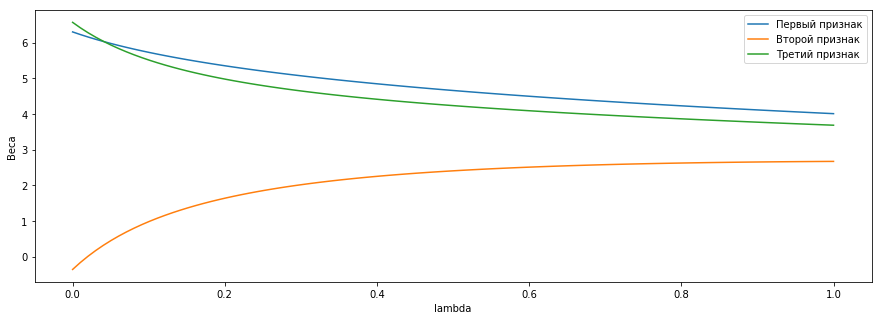

In [87]:
W_1 = []
W_2 = []
W_3 = []

lambdas = np.linspace(1, 1e-10, num=100)

for lambda_ in lambdas:
    W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=lambda_)
    W_1.append(W[1])
    W_2.append(W[2])
    W_3.append(W[3])

plt.figure(figsize = (15,5))
plt.plot(lambdas, W_1, label = 'Первый признак')
plt.plot(lambdas, W_2, label = 'Второй признак')
plt.plot(lambdas, W_3, label = 'Третий признак')
plt.xlabel('lambda')
plt.ylabel('Веса')
plt.legend()

С увеличением значения lambda веса первого и третьего признаков падают, но вес второго растет. Также все веса с увеличением lambda постепенно сходятся к одному значению.

* Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Применять к одному и тому же признаку и нормализацию, и стандартизацию не имеет смысла. Если применить сначала нормализацию, затем стандартизацию, получится то же, что и при применении только стандартизации, и наоборот.

* Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [37]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W))
    return W

In [42]:
W = eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

In [43]:
W

array([56.49995   ,  6.30286274, -0.35565596,  6.57092884])